<div>
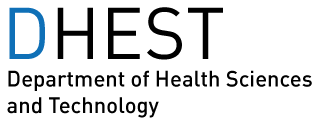
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQe1ZHapHvYNyrCLtdygLfLu92gN3ztZ64m9U8eNLeYE5BKY7r9wJiBgH7cnhZ7B269qw&usqp=CAU" width="300" align="left" style="display: inline;"/>
    <div ><h1 style="display: inline;"><br/>Foundations of Data Science </h1></div>
 </div>

 

# Week 2: Data wrangling

The aim of this tutorial is to familiarise yourself with common `python`, and in particular `pandas`, commands that you will need to inspect and "wrangle" a new data set.

After this tutorial, you should be able to
- use `pandas` commands like `shape()`, `unique()`, `groupby()`, `min()`, `value_counts()`, to interact with and glean basic information from a data set;
- use `seaborn` to create simple plots of your data, and save these for later use;
- identify missing data, for example using `panda`'s `isna()`, and propose a strategy to deal with it. 

In this tutorial, we will use a data set on HIV-AIDS (Source: http://aidsinfo.unaids.org/, https://think.cs.vt.edu/corgis/csv/aids/). The data set records public health metrics for $89$ countries over time.

Before starting to analyse data, it can be helpful to briefly think about what you expect to see based on the (brief) description provided with the data set. What kind of information would you expect to see? How would you expect this information to be arranged?

### 1. import packages and load data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Depending on how (modality, file type, ...), and where your data is stored, data loading can be very straightforward. In this course, you'll mostly be provided with `.csv` files which are small enough to be stored locally and loaded into memory. 

In [2]:
data = pd.read_csv("./aids.csv", index_col=0) # Note the use of a relative path!

### 2. inspect data

What do you think is important to first check when you start to work with a new data set? 

In [3]:
data.dtypes

Country                                                 object
Year                                                     int64
Data.AIDS-Related Deaths.AIDS Orphans                    int64
Data.AIDS-Related Deaths.Adults                          int64
Data.AIDS-Related Deaths.All Ages                      float64
Data.AIDS-Related Deaths.Children                        int64
Data.AIDS-Related Deaths.Female Adults                   int64
Data.AIDS-Related Deaths.Male Adults                     int64
Data.HIV Prevalence.Adults                             float64
Data.HIV Prevalence.Young Men                          float64
Data.HIV Prevalence.Young Women                        float64
Data.New HIV Infections.Young Adults                     int64
Data.New HIV Infections.Male Adults                      int64
Data.New HIV Infections.Female Adults                    int64
Data.New HIV Infections.Children                         int64
Data.New HIV Infections.All Ages                       

Have you observed anything unsual so far? Hint: What data type would you expect to see for any *AIDS-Related Deaths* column? Why?

In [4]:
data.head(10)

,Country,Year,Data.AIDS-Related Deaths.AIDS Orphans,Data.AIDS-Related Deaths.Adults,Data.AIDS-Related Deaths.All Ages,Data.AIDS-Related Deaths.Children,Data.AIDS-Related Deaths.Female Adults,Data.AIDS-Related Deaths.Male Adults,Data.HIV Prevalence.Adults,Data.HIV Prevalence.Young Men,...,Data.New HIV Infections.Female Adults,Data.New HIV Infections.Children,Data.New HIV Infections.All Ages,Data.New HIV Infections.Adults,Data.New HIV Infections.Incidence Rate Among Adults,Data.People Living with HIV.Total,Data.People Living with HIV.Male Adults,Data.People Living with HIV.Female Adults,Data.People Living with HIV.Children,Data.People Living with HIV.Adults
2650,Sierra Leone,2019,44000,2000,3400.0,1400,1000,1200,1.6,0.6,...,2200,2000,5600,3600,0.81,79000,26000,41000,12000,67000
795,Uzbekistan,1998,1000,100,100.0,100,100,100,0.1,0.1,...,100,100,200,200,0.01,1800,1100,1000,100,1700
1378,Kyrgyzstan,2005,100,100,100.0,100,100,100,0.1,0.1,...,200,100,500,500,0.13,1200,1000,500,100,1200
280,Chad,1993,7400,1400,2600.0,1200,1000,1000,1.6,0.8,...,5500,2400,12000,9200,2.81,54000,20000,28000,5600,48000
667,Lao People's Democratic Republic,1997,100,100,100.0,100,100,100,0.1,0.1,...,100,100,500,500,0.09,1000,500,500,100,1000
1852,South Sudan,2010,83000,8100,10000.0,2300,4700,3400,2.2,0.6,...,6800,3200,15000,12000,1.99,140000,52000,72000,17000,120000
380,El Salvador,1994,500,100,200.0,100,100,100,0.1,0.1,...,500,100,1100,1000,0.31,3600,1900,1600,200,3500
2687,Cuba,2020,1600,500,500.0,100,500,100,0.4,0.1,...,1000,100,2000,2000,0.21,33000,20000,13000,200,33000
1601,Zimbabwe,2007,970000,79000,98000.0,19000,44000,35000,16.5,3.6,...,33000,23000,84000,61000,10.21,1300000,460000,630000,160000,1100000
1835,Namibia,2010,73000,2600,3600.0,1000,1500,1100,13.3,2.5,...,5500,1500,11000,9100,8.14,180000,63000,100000,16000,170000


Looking at just the first few rows of the data, do you observe anything unexpected? If yes, can you think of an explanation for this observation?

As you already know that the dataset should contain country-level information recorded over time, it might be a good idea to check what countries are represented, and for which period of time.

In [9]:
alle_länder = data['Country'].unique()
print(alle_länder)
# which countries are represneted in the data set? 

['Sierra Leone' 'Uzbekistan' 'Kyrgyzstan' 'Chad'
 "Lao People's Democratic Republic" 'South Sudan' 'El Salvador' 'Cuba'
 'Zimbabwe' 'Namibia' 'Burkina Faso' 'Liberia' 'Rwanda' 'Tajikistan'
 'Nigeria' 'Peru' 'Costa Rica' 'Colombia' 'Pakistan'
 'Iran (Islamic Republic of)' 'Togo' 'Senegal' 'Lesotho' 'Congo'
 'Cameroon' 'Ethiopia' 'Mozambique' 'Sudan' 'Cambodia' 'Tunisia' 'Egypt'
 'Nepal' 'Suriname' 'Honduras' 'Uganda' 'Georgia' 'Paraguay' 'Gabon'
 'Somalia' 'Democratic Republic of the Congo' 'Azerbaijan' 'Guinea-Bissau'
 'Afghanistan' 'Viet Nam' "Côte d'Ivoire" 'Botswana' 'Ecuador' 'Burundi'
 'Benin' 'Venezuela (Bolivarian Republic of)' 'Thailand' 'Algeria' 'Libya'
 'Malawi' 'Uruguay' 'Madagascar' 'Zambia' 'Philippines'
 'United Republic of Tanzania' 'Ukraine' 'Guyana' 'Mauritius' 'Eritrea'
 'Haiti' 'Saudi Arabia' 'Malaysia' 'South Africa' 'Argentina' 'Portugal'
 'Guatemala' 'Kenya' 'Guinea' 'Niger' 'Angola' 'Republic of Moldova'
 'Bolivia (Plurinational State of)' 'Jamaica' 'Armenia' 'M

In [12]:
anzahl_länder = len(data['Country'].unique())
print(anzahl_länder)

# how many countries are represented?

89


In [26]:
b= max(data['Year'])

a= min(data['Year'])
print(a)
print("bis")
print(b)

# for which time period is data available?

1990
bis
2020


In [29]:
data_sorted = data.sort_values(
    by=[
        'Year'
    ]
)

In [33]:
data_sorted.head(10)

,Country,Year,Data.AIDS-Related Deaths.AIDS Orphans,Data.AIDS-Related Deaths.Adults,Data.AIDS-Related Deaths.All Ages,Data.AIDS-Related Deaths.Children,Data.AIDS-Related Deaths.Female Adults,Data.AIDS-Related Deaths.Male Adults,Data.HIV Prevalence.Adults,Data.HIV Prevalence.Young Men,...,Data.New HIV Infections.Female Adults,Data.New HIV Infections.Children,Data.New HIV Infections.All Ages,Data.New HIV Infections.Adults,Data.New HIV Infections.Incidence Rate Among Adults,Data.People Living with HIV.Total,Data.People Living with HIV.Male Adults,Data.People Living with HIV.Female Adults,Data.People Living with HIV.Children,Data.People Living with HIV.Adults
0,Afghanistan,1990,100,100,100.0,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,100,100,500
51,Mali,1990,4700,1100,2100.0,1000,500,1000,1.1,0.7,...,6000,2200,13000,11000,2.55,50000,21000,24000,4400,46000
80,Ukraine,1990,100,100,100.0,100,100,100,0.1,0.1,...,500,100,1000,1000,0.02,1500,1000,1000,100,1500
19,Democratic Republic of the Congo,1990,49000,9600,17000.0,6900,6800,2800,1.3,0.4,...,36000,13000,63000,49000,2.16,320000,78000,200000,35000,280000
6,Benin,1990,2800,1000,1000.0,1000,500,500,0.8,0.3,...,2400,1100,5300,4200,1.60,21000,8100,11000,2300,19000
62,Peru,1990,17000,2500,2700.0,200,500,2300,0.5,0.1,...,1000,500,6400,6000,0.46,55000,49000,5000,1100,54000
10,Burundi,1990,14000,2500,5300.0,2800,1100,1400,4.1,1.6,...,11000,5900,27000,21000,7.85,110000,50000,52000,13000,100000
48,Madagascar,1990,100,100,100.0,100,100,100,0.1,0.1,...,100,100,100,100,0.01,100,100,100,100,100
56,Nepal,1990,100,100,100.0,100,100,100,0.1,0.1,...,100,100,100,100,0.01,100,100,100,100,100
35,Guyana,1990,100,100,100.0,100,100,100,0.1,0.1,...,100,100,100,100,0.08,200,100,100,100,200


It's also important to check your data's integrity before analysing it. What potential issues can you think of that would affect your analysis?

In [36]:
# check for ... ?
data_sorted.duplicated().sum()

np.int64(15)

What does the above result imply? How would you propose to proceed? If you're unsure how to interpret the output of `duplicated()`, you can check the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html).

In [39]:
data_cleaned = data_sorted.drop_duplicates(keep="first")
data_cleaned.head()

,Country,Year,Data.AIDS-Related Deaths.AIDS Orphans,Data.AIDS-Related Deaths.Adults,Data.AIDS-Related Deaths.All Ages,Data.AIDS-Related Deaths.Children,Data.AIDS-Related Deaths.Female Adults,Data.AIDS-Related Deaths.Male Adults,Data.HIV Prevalence.Adults,Data.HIV Prevalence.Young Men,...,Data.New HIV Infections.Female Adults,Data.New HIV Infections.Children,Data.New HIV Infections.All Ages,Data.New HIV Infections.Adults,Data.New HIV Infections.Incidence Rate Among Adults,Data.People Living with HIV.Total,Data.People Living with HIV.Male Adults,Data.People Living with HIV.Female Adults,Data.People Living with HIV.Children,Data.People Living with HIV.Adults
0,Afghanistan,1990,100,100,100.0,100,100,100,0.1,0.1,...,100,100,100,100,0.01,500,500,100,100,500
51,Mali,1990,4700,1100,2100.0,1000,500,1000,1.1,0.7,...,6000,2200,13000,11000,2.55,50000,21000,24000,4400,46000
80,Ukraine,1990,100,100,100.0,100,100,100,0.1,0.1,...,500,100,1000,1000,0.02,1500,1000,1000,100,1500
19,Democratic Republic of the Congo,1990,49000,9600,17000.0,6900,6800,2800,1.3,0.4,...,36000,13000,63000,49000,2.16,320000,78000,200000,35000,280000
6,Benin,1990,2800,1000,1000.0,1000,500,500,0.8,0.3,...,2400,1100,5300,4200,1.60,21000,8100,11000,2300,19000


When you start to work with a new data set, an essential step is to check for missing values.

In [44]:
# how do you check for missing values?
data_cleaned.isna().sum(axis=1).sum()

np.int64(0)

In [ ]:
# how can you easily aggregate this information per patient?
# no patient information

Based on the previous aggregation of row-level information for duplicates, how would you quickly check if there are any missing values in this data set?

In [ ]:
# and how across the entire data set?

Luckily, there doesn't seem to be any missing values. That's unlikely to always be the case in real-world data though.

Another important command to be aware of is [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), which allows you to apply a function or perform a computation for a particular view of a `DataFrame`. For example, if we want to compute the total number of children orphaned due to AIDS for every country, we can use the following command:

In [45]:
data.groupby("Country")["Data.AIDS-Related Deaths.AIDS Orphans"].sum()

Country
Afghanistan                              65300
Algeria                                  29400
Angola                                 2538600
Argentina                               462800
Armenia                                  18500
                                        ...   
Venezuela (Bolivarian Republic of)      564500
Viet Nam                               1283200
Yemen                                    82700
Zambia                                17204000
Zimbabwe                              21498000
Name: Data.AIDS-Related Deaths.AIDS Orphans, Length: 89, dtype: int64

...or alternatively the average HIV prevalence for every year:

In [48]:
data.groupby("Year")["Data.HIV Prevalence.Adults"].mean()

Year
1990    1.177528
1991    1.420225
1992    1.680435
1993    1.937079
1994    2.179775
1995    2.419101
1996    2.606667
1997    2.778652
1998    2.897753
1999    2.975281
2000    3.019101
2001    3.033708
2002    3.020225
2003    2.928571
2004    2.948315
2005    2.908989
2006    2.894444
2007    2.841573
2008    2.815730
2009    2.808989
2010    2.776667
2011    2.901111
2012    2.923077
2013    2.869231
2014    2.729213
2015    2.696629
2016    2.762222
2017    2.607865
2018    2.558427
2019    2.503371
2020    2.420000
Name: Data.HIV Prevalence.Adults, dtype: float64

### 3. visualise data

While visualisation of data will be covered in more detail in the next lecture and tutorial, another essential step in a first glimpse at any data set is some basic visualisation. `seaborn` and `maptlotlib` provide a lot of functionality to do just that with very little effort.

Let's start with a simple plot of the distribution of AIDS-related deaths across all age groups.

/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


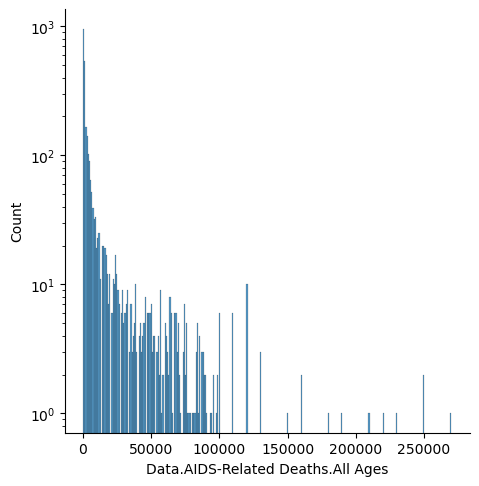

In [51]:
sns.displot(
    x="Data.AIDS-Related Deaths.All Ages",
    data=data
).set(yscale="log")
plt.show()

Is it meaningful to plot the data like this? Why/why not?

/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


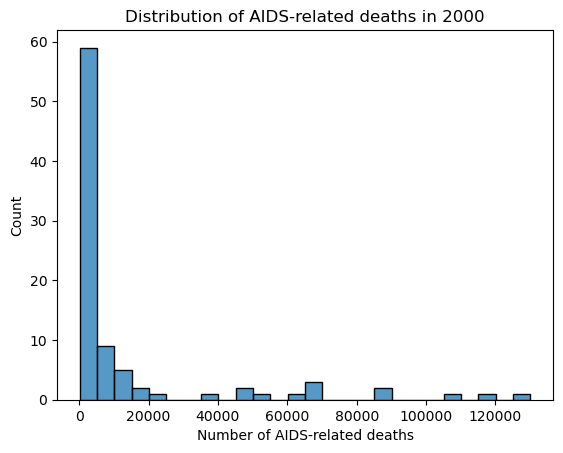

In [54]:
year = 2000
fig_by_year = sns.histplot(
    x="Data.AIDS-Related Deaths.All Ages",
    data=data[data["Year"] == year],
    binwidth=5000
)
fig_by_year.set_title(f"Distribution of AIDS-related deaths in {year}")
fig_by_year.set_xlabel("Number of AIDS-related deaths")
plt.show()

Likely, considering the time dimension of the data set at hand is important -- you can, for example, identifiy trends this way.

/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


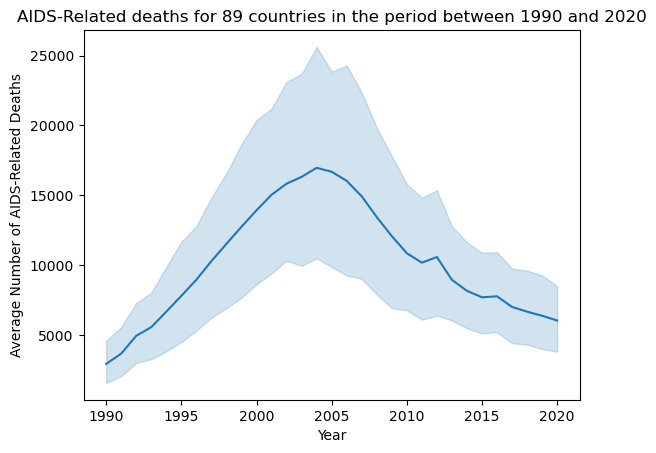

In [53]:
fig_over_time = sns.lineplot(
    x="Year",
    y="Data.AIDS-Related Deaths.All Ages",
    data=data,
)
fig_over_time.set(
    xlabel="Year",
    ylabel="Average Number of AIDS-Related Deaths",
    title=(f"AIDS-Related deaths for {data['Country'].unique().shape[0]} countries in the period " +
           f"between {data['Year'].min()} and {data['Year'].max()}")
)
plt.show()

An alternative way to look at the data is at the country level. 

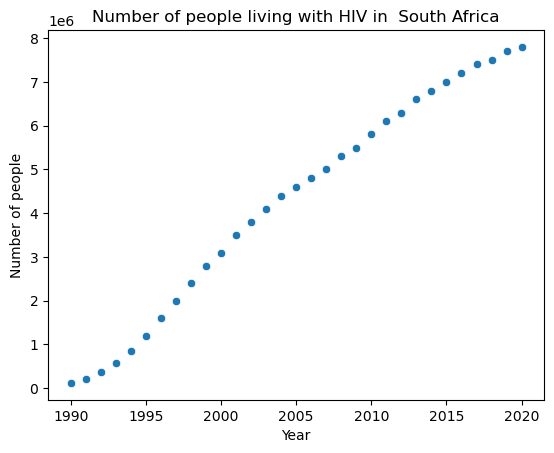

In [55]:
country = "South Africa"
fig_by_country = sns.scatterplot(
    x="Year",
    y="Data.People Living with HIV.Total",
    data=data[data["Country"] == country]
)
fig_by_country.set_title("Number of people living with HIV in  " + country)
fig_by_country.set_ylabel("Number of people")
plt.savefig("./number-of-people-with-HIV.png")

/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/miniconda3/envs/myenv/lib/python3.13/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with 

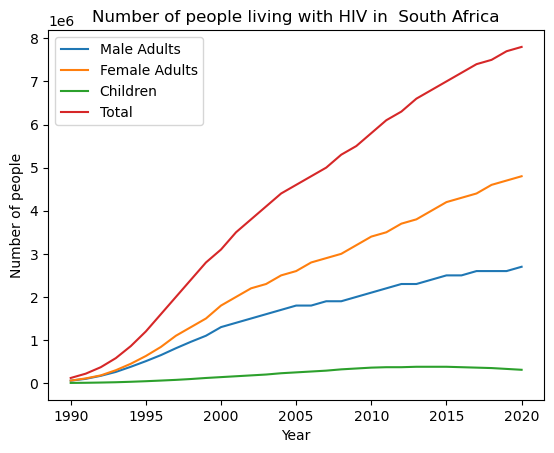

In [56]:
country = "South Africa"
fig_by_country = sns.lineplot(
    x="Year",
    y="values",
    hue="column",
    data=data[
        data["Country"] == country # subset for country
    ].loc[
        :, 
        ["Year"] + [
            "Data.People Living with HIV.Male Adults",
            "Data.People Living with HIV.Female Adults",
            "Data.People Living with HIV.Children",
            "Data.People Living with HIV.Total",
        ]
    ].melt(
        "Year", var_name="column", value_name="values"
    )
)
fig_by_country.set_title("Number of people living with HIV in  " + country)
fig_by_country.set_ylabel("Number of people")
fig_by_country.legend(
    fig_by_country.get_legend_handles_labels()[0],
    [lbl.split(".")[-1] for lbl in fig_by_country.get_legend_handles_labels()[1]]
)
plt.show()